# 02. MACHINE LEARNING

1. Introduction
2. Gradient descent
3. Neural networks
4. Backpropagation
5. Exercise
6. References

# 1. Introduction to machine learning

- $X$ is a set of objects
- $Y$ is a set of answers
- $y^∗: X \rightarrow Y$ is an objective function, the values of which $y_i = y^∗(x_i)$ are known only on a finite subset of objects $\{ x_1, ..., x_l\} \subseteq X$
 
Set of pairs $X_l = \{(x_i, y_i) | i \in \{1, ..., l\} \}$ is called *the training set*.

#### Problem

It is necessary to restore the function $y^∗$ from the set $X_l$.

That is, it is necessary to construct a function $y: X \rightarrow Y$ that would approximate the objective function $y^∗(x)$, not only on the objects of the training set, but also on the entire set $X$.

![](./res/02_learning_scheme.jpg)

#### Оптимизация

Как построить функцию $y: X \rightarrow Y$?

1. Определим вспомогательную функцию потерь (loss function) --- это неотрицательная функция $L(y, x)$, характеризующая величину ошибки функции $y$ на объекте $x$. Если $L(y, x) = 0$, то ответ $y$ называется корректным.
2. В зависимости от значения функции потерь будем корректировать функцию $y$.

Коррекция предполагает:
1. есть некоторое семейство функций $A$
2. функции из $A$ параметризованы: $A = \{f_a | a \in D\}$, $D$ --- множество допустимых параметров
3. есть некоторое правило (удачное или нет), которое выбирает $f_a$ в зависимости от значения функции потерь. В идеале хотим выбрать такую $f_a \in A$, что $L(f_a, x)$ принимает минимальные значения для всех $а$ из $D$.

Пример. Линейная регрессия, двупараметрическое семейство функций (прямые $y = kx + b$).

![](./res/02_linear_regression.jpg)

Поиск фунции потерь $y$ можно представлять спуском по рельефу функции потерь:

![https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png](https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png)

Таким образом, мы имеем *задачу оптимизации*.


#### Как мы поймём, что обучение прошло хорошо?

1. Значение функции потерь.
2. Тестирование на отложенной выборке.

![](./res/02_learning.jpg)


#### Методы оптимизации

Как методы оптимизации вы знаете?

- дифференцируемые функции
- непрерывные функции
- разрывные функции

# 2. Gradient descent

Обычно предполагается, что функция дифференцируема, то можно использовать *градиентный спуск*.

$$\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) -f (x)}{h}$$

![](./res/02_gradient_descent.jpg)

# 3. Neural networks

Cortex neurons (Ramón y Cajal)

![](./res/02_neural_network_human_cortex.png)

#### Модель отдельного нейрона

![](https://www.researchgate.net/publication/374679637/figure/fig2/AS:11431281206265945@1700629912758/Neural-network-architecture.png)

или

![](./res/02_neuron_math.jpg)

#### Нейронная сеть

![](./res/02_neural_network_math.jpg)

#### Универсальность нейронных сетей

Нелинейность

![](./res/02_nonlinearity.jpg)

Теорема Цыбенко

![](./res/02_cybenko_1.png)
![](./res/02_cybenko_2.png)

#### Pytorch

AlexNet, схема

![](./res/02_alexnet.png)

AlexNet, реализация

![](./res/02_alexnet_code.png)

# 4. Backpropagation

#### Как оптимизировать

Предположим, что мы хотим оптимизировать функцию потерь методом градиентного спуска.

1. у нас есть функция потерь $L$, которую мы хотим минимизировать
2. при этом у нас есть параметры модели, которые можем менять
3. если взять параметр $w$, то $\frac{dL}{dw}$ содержит информацию о том, к какому изменению значения функции потерь $L$ приведёт небольшое изменение параметра $w$.

Предположим, что $y = g(x)$ и $z = f (g(x)) = f (y)$.
Тогда $$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}.$$


#### Проблема

Возьмём чуть более сложную ситуацию: $x = f(w)$, $y = f(x)$, $z = f(y)$.
Тогда
$$\frac{dz}{dw} = \frac{dz}{dy} \frac{dy}{dx} \frac{dx}{dw} =$$
$$= f'(y) f'(x) f'(w) =$$
$$= f'(f(f(w))) f'(f(w)) f'(w).$$

Выражение $f(w)$ возникает более одного раза. Варианты:
1. вычислить, сохранить и использовать
2. вычислять каждый раз

#### Решение

Как эту проблему можно решить? --- Алгоритм обратного распространения.

Впервые метод был описан в 1974 г. А. И. Галушкиным, а также независимо и одновременно Полом Дж. Вербосом

![](./res/02_learning_process.jpg)

#### micrograd

Как устроена работа с градиентами?

https://github.com/karpathy/micrograd

In [1]:
from micrograd.engine import Value
from graphviz import Digraph

In [2]:
# utilities

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{data %.2f | grad %.2f}" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

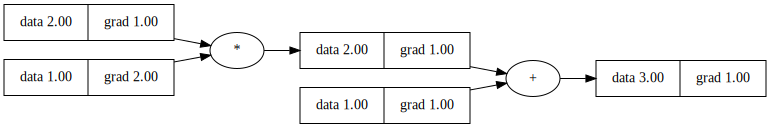

In [3]:
x = Value(1.0); x.label = 'x'
#y = (x * 2 + 1).relu()
y = x * 2 + 1
y.backward()
draw_dot(y)

https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py

![](./res/02_micrograd_value.png)

### PyTorch

![](./res/02_computation_graph_pytorch.jpg)

# 5. Exercise

Реализовать одну из операций:
1. $e^x$ --- экспонента
2. $\tanh(x)$ --- гиперболический тангенс

как метод класса [Value](https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L2). Для тестирования надо построить небольшой вычислительный граф, запустить обратное распространение и отрисовать ([пример](https://github.com/karpathy/micrograd/blob/master/trace_graph.ipynb)).

Пример для операции сложения: https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L13.
Дополнительные [пояснения](https://www.youtube.com/watch?v=VMj-3S1tku0).

# 6. References

1. [Goodfellow et al - Deep learning](https://www.deeplearningbook.org/)
2. [Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools](https://www.manning.com/books/deep-learning-with-pytorch)
3. [Karpathy - The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0)
4. [Zhang et al - Dive into Deep Learning](https://d2l.ai/)
5. [Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
6. [Ramón y Cajal and the Case for Drawing in Science](https://www.scientificamerican.com/blog/sa-visual/ramon-y-cajal-and-the-case-for-drawing-in-science2/)